In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from datetime import datetime
import time
BTCrawdata = requests.get('https://production.api.coindesk.com/v2/price/values/BTC?start_date=2020-01-01T00:00&end_date=2021-01-04T12:00&ohlc=false').json()
ETHrawdata = requests.get('https://production.api.coindesk.com/v2/price/values/ETH?start_date=2020-01-01T00:00&end_date=2021-01-04T12:00&ohlc=false').json()
BTCrawdata['data']

{'iso': 'BTC',
 'name': 'Bitcoin',
 'slug': 'bitcoin',
 'interval': '1-day',
 'entries': [[1577923199000, 7174.7440119511],
  [1578009599000, 6955.4875796712],
  [1578095999000, 7291.2195053189],
  [1578182399000, 7337.6366701377],
  [1578268799000, 7347.4332644392],
  [1578355199000, 7713.8607536496],
  [1578441599000, 8039.6037008183],
  [1578527999000, 8067.6063690564],
  [1578614399000, 7808.7013638165],
  [1578700799000, 8087.4528852359],
  [1578787199000, 8078.9935319903],
  [1578873599000, 8149.3137171468],
  [1578959999000, 8116.9610079465],
  [1579046399000, 8735.1424391365],
  [1579132799000, 8843.6757322237],
  [1579219199000, 8711.6375778988],
  [1579305599000, 8925.2990284456],
  [1579391999000, 8939.8643002492],
  [1579478399000, 8638.1814404614],
  [1579564799000, 8652.6837629859],
  [1579651199000, 8708.786013433],
  [1579737599000, 8635.0743569587],
  [1579823999000, 8384.0887767671],
  [1579910399000, 8451.2322960209],
  [1579996799000, 8347.567505406],
  [15800831990

In [2]:
BTCdf = pd.DataFrame(BTCrawdata['data']['entries'], columns=['Time','Closing Price ($)'])
BTCdf.shape
open_prices = [BTCdf.iloc[0,1]] + BTCdf.iloc[0:369,1].tolist()
BTCdf['Opening Price ($)'] = open_prices
print(BTCdf.head())

            Time  Closing Price ($)  Opening Price ($)
0  1577923199000        7174.744012        7174.744012
1  1578009599000        6955.487580        7174.744012
2  1578095999000        7291.219505        6955.487580
3  1578182399000        7337.636670        7291.219505
4  1578268799000        7347.433264        7337.636670


In [3]:
n_units_in_a_day = BTCdf.loc[1,'Time'] - BTCdf.loc[0,'Time']
n_units_in_a_sec = n_units_in_a_day/24/60/60
print(n_units_in_a_sec)
BTCdf['Time'] = BTCdf['Time']/n_units_in_a_sec
print(BTCdf['Time'].head())

1000.0
0    1.577923e+09
1    1.578010e+09
2    1.578096e+09
3    1.578182e+09
4    1.578269e+09
Name: Time, dtype: float64


In [4]:
a = int(BTCdf.loc[0,'Time'])
c = datetime.utcfromtimestamp(a).strftime('%Y/%m/%d %H:%M:%S')
e = datetime.strptime(c,"%Y/%m/%d %H:%M:%S")
d = '2020/01/01 00:00:00'
b = datetime.strptime(d,"%Y/%m/%d %H:%M:%S")
timedelta = b-e
add = timedelta.total_seconds()

In [5]:
BTCdf['Time'] = BTCdf['Time'] + add
print(BTCdf['Time'].head())
datetime.utcfromtimestamp(BTCdf['Time'][0]).strftime('%Y/%m/%d %H:%M:%S')

0    1.577837e+09
1    1.577923e+09
2    1.578010e+09
3    1.578096e+09
4    1.578182e+09
Name: Time, dtype: float64


'2020/01/01 00:00:00'

In [6]:
time = []
for i in range(370):
    time_i = datetime.utcfromtimestamp(BTCdf.loc[i,'Time']).strftime('%Y/%m/%d %H:%M:%S')
    time.append(time_i)
BTCdf['Date Time'] = time
print(BTCdf.head())


           Time  Closing Price ($)  Opening Price ($)            Date Time
0  1.577837e+09        7174.744012        7174.744012  2020/01/01 00:00:00
1  1.577923e+09        6955.487580        7174.744012  2020/01/02 00:00:00
2  1.578010e+09        7291.219505        6955.487580  2020/01/03 00:00:00
3  1.578096e+09        7337.636670        7291.219505  2020/01/04 00:00:00
4  1.578182e+09        7347.433264        7337.636670  2020/01/05 00:00:00


                     Opening Price ($)  Closing Price ($)
Date Time                                                
2020/01/01 00:00:00        7174.744012        7174.744012
2020/01/02 00:00:00        7174.744012        6955.487580
2020/01/03 00:00:00        6955.487580        7291.219505
2020/01/04 00:00:00        7291.219505        7337.636670
2020/01/05 00:00:00        7337.636670        7347.433264
...                                ...                ...
2020/12/31 00:00:00       28768.836208       29111.521567
2021/01/01 00:00:00       29111.521567       29333.605121
2021/01/02 00:00:00       29333.605121       32154.167363
2021/01/03 00:00:00       32154.167363       33002.536427
2021/01/04 00:00:00       33002.536427       31431.612280

[370 rows x 2 columns]


<function matplotlib.pyplot.show(*args, **kw)>

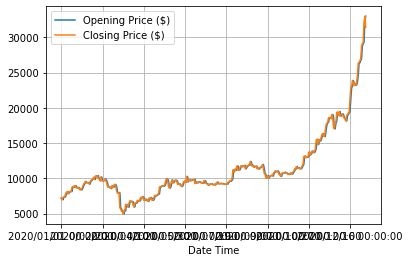

In [7]:
BTCdf.drop(['Time'], axis=1)
set_BTC_dates = BTCdf.set_index('Date Time')
set_BTC_dates = set_BTC_dates[['Opening Price ($)', 'Closing Price ($)']]
print(set_BTC_dates)

<function matplotlib.pyplot.show(*args, **kw)>

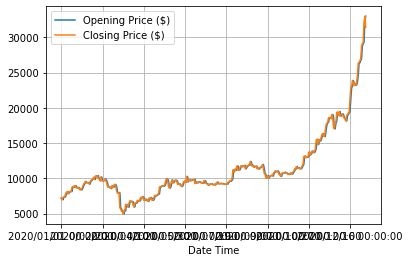

In [8]:
set_BTC_dates.plot(grid=True)
plt.show